# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1384 Камынин Александр. Вариант №5

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
1. Линейная регрессия некоторой зависимой переменной $y$ на наборе независимых переменных $x = (x_1, …, x_n)$, где n – это число наблюдений, может быть описано следующим уравнением: $y =\beta_0  + \beta_1 x_1 + ⋯ + \beta_n x_n + \varepsilon$. Здесь $\beta_0, \beta_1, …, \beta_n$ – коэффициенты регрессии (параметры), а $\varepsilon$ - некоторая погрешность (случайная ошибка).

2. Для определения параметров используется МНК (Метод Наименьших Квадратов), минимизирующий разницу между наблюдениями и моделью с подобранными параметрами:
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

$$ RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2} $$

$$ \frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m \text{ - нормальное уравнение} $$

> Нормальные уравнения в матричной форме: $XX^{\intercal}\beta=XY$

> Решение системы нормальных уравнений: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$

<br>
<br>

3. Несмещённая оценка дисперсии $S^{2}$

$$ \displaystyle S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r} $$

$$SS_{e}=RSS(\widehat{\beta}) \text{, а } r \text{ - ранг матрицы } X $$

<br>
<br>

4. ДНО функции: $\psi=C^{\intercal}\beta$

> МНК-оценка: $\widehat{\psi}=C^{\intercal}\beta$

> Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$

> Распределение $\widehat{\psi} \sim \mathcal{N}(\psi,\sigma^{2}b)$

$$\displaystyle \frac{\widehat{\psi}-\psi}{S\sqrt{b}} \sim \mathcal{S}_{n-r}$$

> Доверительный интервал уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b},\widehat{\psi} + X_{\alpha}S\sqrt{b} \right]$, где $\displaystyle X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

<br>
<br>

5. Уравнение доверительного эллипсоида
$A_{\alpha}=\left\{ \vec{x}:(\vec{x}-\widehat{\psi})^{\intercal}B^{-1}(\vec{x}-\widehat{\psi}) \le qS^{2}x_{\alpha} \right\}$, где $\widehat{\psi}$ - вектор оценок параметров, $B$ - матрица оценок ковариации, $S^{2}$ - оценка дисперсии, $q$ - пороговая точка, связанная с распределением $\chi^2_{n-r}$, $x_{\alpha}$ - значение функции распределения $\chi^2_{n-r}$ и уровнем доверия $1-\alpha$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной Y от переменной X.

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [97]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([
    4, 3, 3, 4, 3, 0, 5, 3, 2, 2, 5, 5, 4, 3, 2, 4, 3,
    2, 3, 2, 3, 4, 4, 4, 2, 2, 1, 4, 3, 3, 2, 3, 2, 4,
    2, 3, 4, 1, 3, 2, 2, 4, 2, 3, 2, 2, 2, 0, 2, 3
])

Y = np.array([
    14.63, 28.12, 27.54, 14.11, 7.56, 5.33, 13.92, 14.71, 6.68, 24.42, 16.23, 15.68, 9.10, 22.82, 14.07, 9.09, 7.51,
    6.08, 16.22, 18.63, 2.74, 8.13, 5.99, 20.10, 10.67, 17.06, 16.13, 17.73, 6.84, 12.15, 16.36, 18.16, 1.04, 18.73,
    16.01, 5.51, 2.93, 8.79, 15.83, 1.48, 7.22, 11.00, 11.75, 7.23, 3.85, 12.45, 13.64, 24.97, 14.31, 10.07
])

n = len(X)

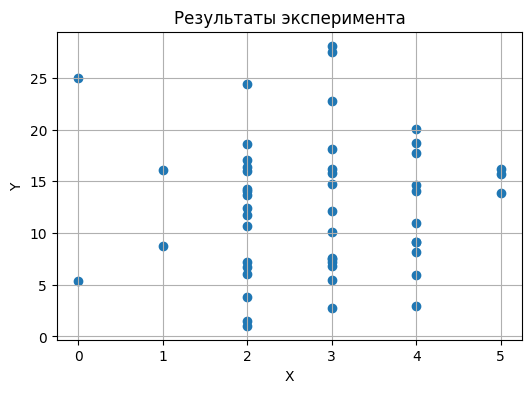

In [98]:
fig = plt.figure(figsize=(6,4))

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.grid()

plt.show()

Линейная регрессионная модель имеет следующий вид: $Y = \beta_0 + \beta_1 \cdot X + \epsilon $, где $\beta_0$ - сдвиг, $\beta_1$ - масштаб, а $\epsilon$ - погрешность.

Построим МНК оценки параметров $\beta_0$ и $\beta_1$. Для этого решим нормальные уравнения в матричной форме $\hat{\beta} = (XX^t)^{-1}XY$

In [99]:
matrix_x = np.array([[1.] * n, X])

result = np.dot(matrix_x, matrix_x.T)
result = np.linalg.inv(result)
result = np.dot(result, matrix_x)
result = np.dot(result, Y)

beta0 = result[0]
beta1 = result[1]
print(f'beta0 = {beta0:.3f}, beta1 = {beta1:.3f}')

beta0 = 12.057, beta1 = 0.203


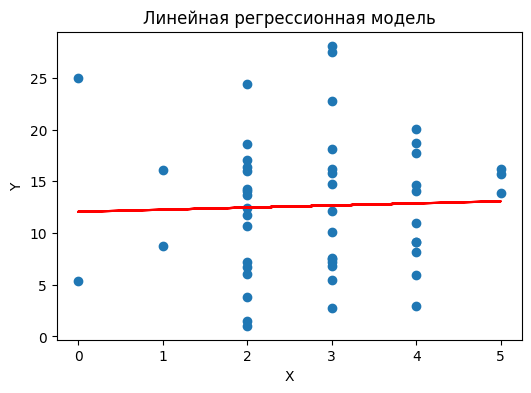

In [100]:
fig = plt.figure(figsize=(6,4))

Y_pred = beta0 + beta1 * X

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная регрессионная модель')
plt.show()

### 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Оценивание параметра $\sigma^2: s^2 = \frac{RSS(\hat{\beta})}{n-r} = \frac{1}{n-r} \sum_{i=1}^{n}(Y_i - \hat{\beta_0} - \hat{\beta_1}X_i)^2 $, где r - число параметров, в данном случае 2.

In [101]:
RSS = np.sum((Y - beta0 - beta1 * X)**2)
r = 2
var_estimation = RSS / (n - r)

print(f'Несмещенная оценка дисперсии: {var_estimation:.3f}')

Несмещенная оценка дисперсии: 44.437


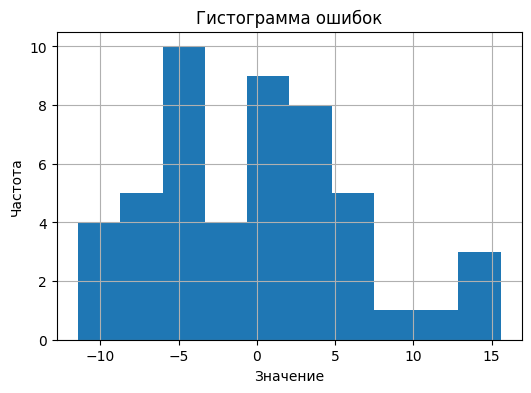

In [102]:
# Построение гистограммы ошибок с шагом h=2.70
fig = plt.figure(figsize=(6,4))

h = 2.70
errors = Y - Y_pred

hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

plt.show()

Основная гипотеза: $H_0: \vec{\epsilon} \sim \mathcal{N}(0, \sigma^2)$<br>
Статистика критерия: $\chi^2 = \sum_{j=1}^{k}\frac{ (\nu_j - np_{jo})^2 }{ np_{j0} }$, где k - количество интервалов, $\nu_i$ - абсолютная частота, а $p_{j0} = \mathbb{P}(\xi \in I_i) = \left[ \text{Пусть a и b - границы интервала} \right] = F_0(b_i) - F_0(a_i)$ - вероятность попадания в интервал

In [103]:
from scipy import stats

# проверка гипотезы нормальности ошибок на уровне значимости alpha=0.05
def calculate_expected_freq(n, intervals, var_estimation):
  k = len(intervals)
  probabilities = stats.norm.cdf(intervals[1:k], 0, np.sqrt(var_estimation)) - stats.norm.cdf(intervals[0:k-1], 0, np.sqrt(var_estimation))
  return n*probabilities

expected_freq = calculate_expected_freq(n, bin_edges, var_estimation)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print(f'Статистика критерия chi^2 = {chi_stats:.3f}')

Статистика критерия chi^2 = 12.567


Выбираем $X_{\alpha}: K_{k-d-1}(X_{\alpha}) = 1 - \alpha = 1 - 0.05 = 0.95$, где $K_{k-1}$ - функция распределения $\chi_{k-d-1}^2$

In [104]:
alpha = 0.05
k = len(expected_freq)
x_alpha = stats.chi2.ppf(1 - alpha, k-1-1)
print(f'Xalpha = {x_alpha:.3f}')

Xalpha = 15.507


$ \chi^2 = 12.567 \leq X_{\alpha} = 15.507$, следовательно гипотеза принимается

Оценка расстояния до класса нормальных распределений по Колмогорову: $ KS = sup|F_n(X) - F_0(X)|$

In [105]:
values = np.arange(min(errors) - h, max(errors) + h, h)
sorted_errors = np.sort(errors)
Fn = np.array([np.sum(sorted_errors < x)/n for x in values])
F0 = np.array([stats.norm.cdf(x, 0, np.sqrt(var_estimation)) for x in values])

difference = abs(Fn - F0)
Dn = max(difference)
print(f"Предельное Dn равно {Dn:.3f}")

x_alpha = stats.ksone.ppf(1-alpha, n)
print(f'Xalpha = {x_alpha:.3f}')
print(f'sqrt(n) * Dn = {(np.sqrt(n) * Dn):.3f}')

if np.sqrt(n) * Dn >= x_alpha:
  print('Гипотеза H0 о нормальности отвергается')
else:
  print('Гипотеза H0 о нормальности принимается')

Предельное Dn равно 0.071
Xalpha = 0.170
sqrt(n) * Dn = 0.502
Гипотеза H0 о нормальности отвергается


Так как $\sqrt{n} \cdot D_n =  0.502 \geq X_{\alpha} = 0.170 $, то есть гипотеза отвергается

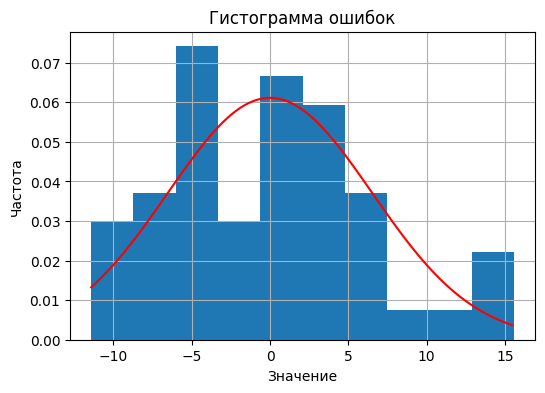

In [106]:
#визуальная оценка нормальности распределения ошибок
fig = plt.figure(figsize=(6,4))

hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), density=True)
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
values = np.linspace(min(errors), max(errors), 100)
plt.plot(values, stats.norm.pdf(values, errors.mean(), errors.std()), color='red')

plt.show()

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

$ \psi = C^t \beta $

Элемент дисперсии оценки: $ b_{\psi} = C^t (XX^t)^{-1} C $

$ \frac{ \hat{\psi} - \psi }{ s\sqrt{b} } \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha $: $ \psi \in \left[ \hat{\psi} - x_{\alpha}s\sqrt{b}; \hat{\psi} + x_{\alpha}s\sqrt{b} \right], \text{где } x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2} $

Для $\beta_0$ в качестве матрицы C выбираем $C = \pmatrix{1 \\ 0}$

Для $\beta_1$ в качестве матрицы C выбираем $C = \pmatrix{0 \\ 1}$

In [107]:
alpha = 0.05
r = 2
x_alpha = stats.t.ppf(1-alpha/2, n-r)
print(f'Xalpha = {x_alpha:.3f}')

matrix_x = np.array([[1.] * n, X])

# вычисление дов.интервала для β0
C = np.array([1,0])
XX_t = np.dot(matrix_x, matrix_x.T)
b0 = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
print(f'b0 = {b0:.3f}')
print(f'Доверительный интервал для  β0:\
 [\
     {beta0 - x_alpha * np.sqrt(var_estimation) * np.sqrt(b0)}; \
     {beta0 + x_alpha * np.sqrt(var_estimation) * np.sqrt(b0)} \
 ]')

# вычисление дов.интервала для β1
C = np.array([0,1])
b1 = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
print(f'b1 = {b1:.3f}')
print(f'Доверительный интервал для  β1:\
 [\
     {beta1 - x_alpha * np.sqrt(var_estimation) * np.sqrt(b1)}; \
     {beta1 + x_alpha * np.sqrt(var_estimation) * np.sqrt(b1)} \
 ]')

Xalpha = 2.011
b0 = 0.142
Доверительный интервал для  β0: [     6.9978936662602305;      17.117056333739775  ]
b1 = 0.016
Доверительный интервал для  β1: [     -1.4722072974351592;      1.8785822974351603  ]


Доверительный эллипсоид уровня доверия $1-\alpha: A_{\alpha} = \{ \vec{x}: (\vec{x} - \hat{\psi})^t B^{-1} (\vec{x} - \hat{\psi}) \leq q s^2 x_{\alpha} \}$, где $ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

Пусть $ B = C^t (XX^t)^{-1} C $

В качестве вектора возьмем $ \vec{x}= P(\hat{\psi} - \psi) $, где P - матрица собственных векторов $XX^t$

Тогда уравнение эллипсоида: $ \lambda_1 x^2 + \lambda_2 y^2 \leq q s^2 x_{\alpha} $, где $ \lambda_1, \lambda_2$ - собственные числа матрицы $XX^t $

$ \frac{\lambda_1}{q s^2 x_{\alpha}} x^2 + \frac{\lambda_2}{q s^2 x_{\alpha}} y^2 \leq 1 $

Большая и малая полуоси могут быть вычислены как $ \frac{q s^2 x_{\alpha}}{\lambda_1} $ и $ \frac{q s^2 x_{\alpha}}{\lambda_2} $ соответственно.

In [108]:
eigenvalues, eigenvectors = np.linalg.eig(XX_t)
r = 2
x_alpha = stats.f.ppf(1-alpha, 2, n-r)

print(f'Xalpha = {x_alpha}')
print(f'Собственные числа = {eigenvalues}')
print(f'Собственные вектора =\n {eigenvectors}')
print(f'Большая полуось равна: {2 * var_estimation * x_alpha / eigenvalues[0] :.3f}')
print(f'Малая полуось равна: {2 * var_estimation * x_alpha / eigenvalues[1] :.3f}')

print(f'beta0 = {beta0:.3f}, beta1={beta1:.3f}')

Xalpha = 3.1907273359284987
Собственные числа = [  6.40519065 499.59480935]
Собственные вектора =
 [[-0.95478081 -0.29731062]
 [ 0.29731062 -0.95478081]]
Большая полуось равна: 44.273
Малая полуось равна: 0.568
beta0 = 12.057, beta1=0.203


$ \vec{x}= P(\hat{\psi} - \psi) = \pmatrix{ -0.955 & 0.297 \\ -0.297 & -0.955 } \cdot \pmatrix{ 12.057 - \beta_0 \\ 0.203 - \beta_1 } = \pmatrix{ -11.575 + 0.955\beta_0 + 0.297\beta_1 \\ 3.387 - 0.297\beta_0 + 0.955\beta_1 }$

Таким образом, область эллипса принимает вид: $ \frac{(-11.454 + 0.955\beta_0 - 0.297\beta_1)^2}{44.273} + \frac{(-3.77 + 0.297\beta_0 + 0.955\beta_1)^2}{0.568} \leq 1 $

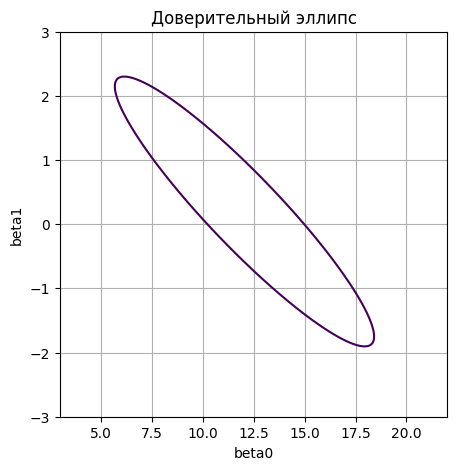

In [109]:
beta0_values, beta1_values = np.meshgrid(np.linspace(3, 22, 300), np.linspace(-3, 3, 300))

a = np.sqrt(2 * var_estimation * x_alpha / eigenvalues[0])
b = np.sqrt(2 * var_estimation * x_alpha / eigenvalues[1])
def ellipse_func(b0, b1):
  return (-11.454 + 0.955 * b0 - 0.297 * b1)**2 / a**2 + \
   (-3.77 + 0.297 * b0 + 0.955 * b1)**2 / b**2

z = ellipse_func(beta0_values, beta1_values)

fig = plt.figure(figsize=(5,5))
plt.contour(beta0_values, beta1_values, z, levels=[1])
plt.title('Доверительный эллипс')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.grid()

plt.show()

### 4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Основная гипотеза о независимости переменной Y от переменной X: $H_0: \beta_1 = 0$

F-статистика: $ \mathbb{F} = \frac{\hat{\psi} B^-1 \psi }{qs^2} \sim F_{q,n-r}$

Пусть $ B = C^t (XX^t)^{-1} C $

$ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

При основной гипотезе $ C = \pmatrix{0 \\ 1}, \hat{\psi} = \beta_1, q=1$

In [110]:
alpha = 0.05
q = 1
x_alpha = stats.f.ppf(1-alpha, 1, n-2)
print(f'Xalpha = {x_alpha:.3f}')


C = np.array([0,1])
matrix_x = np.array([[1.] * n, X])
XX_t = np.dot(matrix_x, matrix_x.T)
B = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
F = (beta1 * 1 * beta1) / (B * q * var_estimation)
print(f'Значение статистики F = {F:.3f}')

if F >= x_alpha:
  print('Гипотеза H0 отвергается')
else:
  print('Гипотеза H0 принимается')

Xalpha = 4.043
Значение статистики F = 0.059
Гипотеза H0 принимается


$ F = 0.059 < x_{\alpha} = 4.043$, то есть гипотеза принимается

In [111]:
p_value = 1 - stats.f.cdf(F, q, n-2)
print(f'Гипотеза H0 отвергается как только уровень значимости превышает {p_value:.3f}')

Гипотеза H0 отвергается как только уровень значимости превышает 0.808


### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Квадратичная регрессионная модель имеет следующий вид: $Y = \beta_0 + \beta_1 \cdot X + \beta_2 \cdot X^2 + \epsilon $

Построим МНК оценки параметров $\beta_0, \beta_1, \beta_2$. Для этого решим нормальные уравнения в матричной форме $\hat{\beta} = (XX^t)^{-1}XY$

In [112]:
matrix_x = np.array([[1.] * n, X, [x**2 for x in X]])

result = np.dot(matrix_x, matrix_x.T)
result = np.linalg.inv(result)
result = np.dot(result, matrix_x)
result = np.dot(result, Y)

beta0 = result[0]
beta1 = result[1]
beta2 = result[2]
print(f'beta0 = {beta0:.3f}, beta1 = {beta1:.3f}, beta2 = {beta2:.3f}')

beta0 = 14.216, beta1 = -1.743, beta2 = 0.361


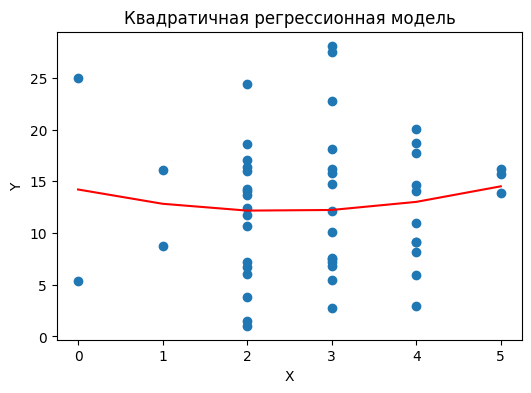

In [113]:
fig = plt.figure(figsize=(6,4))

x_values = np.unique(X)
Y_pred = beta0 + beta1 * x_values + beta2 * x_values**2

plt.scatter(X, Y)
plt.plot(x_values, Y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Квадратичная регрессионная модель')
plt.show()

# обновляем для восстановления размерности предсказанных значений
Y_pred = beta0 + beta1 * X + beta2 * X**2

### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Оценивание параметра $\sigma^2: s^2 = \frac{RSS(\hat{\beta})}{n-r} = \frac{1}{n-r} \sum_{i=1}^{n}(Y_i - \hat{\beta_0} - \hat{\beta_1}X_i)^2 $, где r - число параметров, в данном случае 3.

In [114]:
RSS = np.sum((Y - beta0 - beta1 * X - beta2 * X**2)**2)
r = 3
var_estimation = RSS / (n - r)

print(f'Несмещенная оценка дисперсии: {var_estimation:.3f}')

Несмещенная оценка дисперсии: 44.941


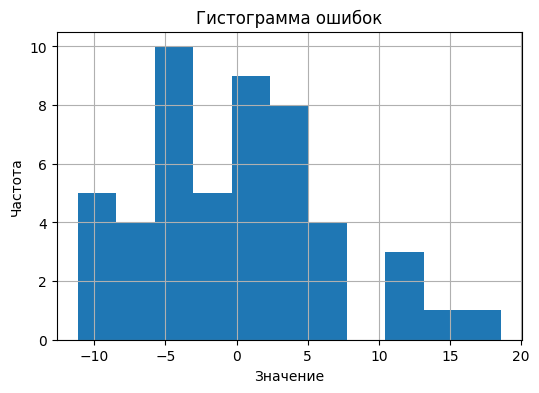

In [115]:
# Построение гистограммы ошибок с шагом h=2.70
fig = plt.figure(figsize=(6,4))

h = 2.70
errors = Y - Y_pred

hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

plt.show()

Основная гипотеза: $H_0: \vec{\epsilon} \sim \mathcal{N}(0, \sigma^2)$<br>
Статистика критерия: $\chi^2 = \sum_{j=1}^{k}\frac{ (\nu_j - np_{jo})^2 }{ np_{j0} }$, где k - количество интервалов, $\nu_i$ - абсолютная частота, а $p_{j0} = \mathbb{P}(\xi \in I_i) = \left[ \text{Пусть a и b - границы интервала} \right] = F_0(b_i) - F_0(a_i)$ - вероятность попадания в интервал

In [116]:
from scipy import stats

# проверка гипотезы нормальности ошибок на уровне значимости alpha=0.05
def calculate_expected_freq(n, intervals, var_estimation):
  k = len(intervals)
  probabilities = stats.norm.cdf(intervals[1:k], 0, np.sqrt(var_estimation)) - stats.norm.cdf(intervals[0:k-1], 0, np.sqrt(var_estimation))
  return n*probabilities

expected_freq = calculate_expected_freq(n, bin_edges, var_estimation)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print(f'Статистика критерия chi^2 = {chi_stats:.3f}')

Статистика критерия chi^2 = 11.066


Выбираем $X_{\alpha}: K_{k-d-1}(X_{\alpha}) = 1 - \alpha = 1 - 0.05 = 0.95$, где $K_{k-1}$ - функция распределения $\chi_{k-d-1}^2$

In [117]:
alpha = 0.05
k = len(expected_freq)
x_alpha = stats.chi2.ppf(1 - alpha, k-1-1)
print(f'Xalpha = {x_alpha:.3f}')

Xalpha = 16.919


$ \chi^2 = 11.066 < X_{\alpha} = 16.919$, следовательно гипотеза принимается

Оценка расстояния до класса нормальных распределений по Колмогорову: $ KS = sup|F_n(X) - F_0(X)|$

In [118]:
values = np.arange(min(errors) - h, max(errors) + h, h)
sorted_errors = np.sort(errors)
Fn = np.array([np.sum(sorted_errors < x)/n for x in values])
F0 = np.array([stats.norm.cdf(x, 0, np.sqrt(var_estimation)) for x in values])

difference = abs(Fn - F0)
Dn = max(difference)
print(f"Предельное Dn равно {Dn:.3f}")

x_alpha = stats.ksone.ppf(1-alpha, n)
print(f'Xalpha = {x_alpha:.3f}')
print(f'sqrt(n) * Dn = {(np.sqrt(n) * Dn):.3f}')

if np.sqrt(n) * Dn >= x_alpha:
  print('Гипотеза H0 о нормальности отвергается')
else:
  print('Гипотеза H0 о нормальности принимается')

Предельное Dn равно 0.055
Xalpha = 0.170
sqrt(n) * Dn = 0.386
Гипотеза H0 о нормальности отвергается


Так как $\sqrt{n} \cdot D_n =  0.386 \geq X_{\alpha} = 0.170 $, то есть гипотеза отвергается

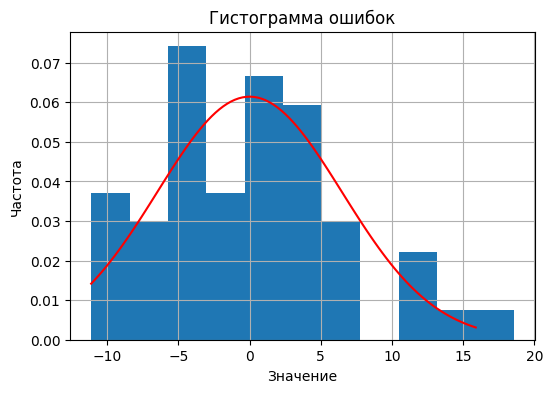

In [119]:
#визуальная оценка нормальности распределения ошибок
fig = plt.figure(figsize=(6,4))

hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), density=True)
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
values = np.linspace(min(errors), max(errors), 100)
plt.plot(values, stats.norm.pdf(values, errors.mean(), errors.std()), color='red')

plt.show()

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

$ \psi = C^t \beta $

Элемент дисперсии оценки: $ b_{\psi} = C^t (XX^t)^{-1} C $

$ \frac{ \hat{\psi} - \psi }{ s\sqrt{b} } \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha $: $ \psi \in \left[ \hat{\psi} - x_{\alpha}s\sqrt{b}; \hat{\psi} + x_{\alpha}s\sqrt{b} \right], \text{где } x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2} $

Для $\beta_0$ в качестве матрицы C выбираем $C = \pmatrix{1 \\ 0 \\ 0}$

Для $\beta_1$ в качестве матрицы C выбираем $C = \pmatrix{0 \\ 1 \\ 0}$

Для $\beta_2$ в качестве матрицы C выбираем $C = \pmatrix{0 \\ 0 \\ 1}$

In [120]:
alpha = 0.05
r = 3
x_alpha = stats.t.ppf(1-alpha/2, n-r)
print(f'Xalpha = {x_alpha:.3f}')

matrix_x = np.array([[1.] * n, X, [x**2 for x in X]])

# вычисление дов.интервала для β0
C = np.array([1,0,0])
XX_t = np.dot(matrix_x, matrix_x.T)
b0 = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
print(f'b0 = {b0:.3f}')
print(f'Доверительный интервал для  β0:\
 [\
     {beta0 - x_alpha * np.sqrt(var_estimation) * np.sqrt(b0)}; \
     {beta0 + x_alpha * np.sqrt(var_estimation) * np.sqrt(b0)} \
 ]')

# вычисление дов.интервала для β1
C = np.array([0,1,0])
b1 = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
print(f'b1 = {b1:.3f}')
print(f'Доверительный интервал для  β1:\
 [\
     {beta1 - x_alpha * np.sqrt(var_estimation) * np.sqrt(b1)}; \
     {beta1 + x_alpha * np.sqrt(var_estimation) * np.sqrt(b1)} \
 ]')

# вычисление дов.интервала для β2
C = np.array([0,0,1])
b2 = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
print(f'b2 = {b2:.3f}')
print(f'Доверительный интервал для  β2:\
 [\
     {beta2 - x_alpha * np.sqrt(var_estimation) * np.sqrt(b2)}; \
     {beta2 + x_alpha * np.sqrt(var_estimation) * np.sqrt(b2)} \
 ]')


Xalpha = 2.012
b0 = 0.367
Доверительный интервал для  β0: [     6.04502330903132;      22.38728078710468  ]
b1 = 0.198
Доверительный интервал для  β1: [     -7.746929870336924;      4.260830377059342  ]
b2 = 0.006
Доверительный интервал для  β2: [     -0.7075062714547218;      1.4291701404285555  ]


Доверительный эллипсоид уровня доверия $1-\alpha: A_{\alpha} = \{ \vec{x}: (\vec{x} - \hat{\psi})^t B^{-1} (\vec{x} - \hat{\psi}) \leq q s^2 x_{\alpha} \}$, где $ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

Пусть $ B = C^t (XX^t)^{-1} C $

В качестве вектора возьмем $ \vec{x}= P(\hat{\psi} - \psi) $, где P - матрица собственных векторов $XX^t$

Тогда уравнение эллипсоида: $ \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \leq q s^2 x_{\alpha} $, где $ \lambda_1, \lambda_2, \lambda_3$ - собственные числа матрицы $XX^t $

$ \frac{\lambda_1}{q s^2 x_{\alpha}} x^2 + \frac{\lambda_2}{q s^2 x_{\alpha}} y^2 + \frac{\lambda_3}{q s^2 x_{\alpha}} z^2 \leq 1 $

Полуоси по x, y, z могут быть вычислены как $ \frac{q s^2 x_{\alpha}}{\lambda_1} $, $ \frac{q s^2 x_{\alpha}}{\lambda_2} $, $ \frac{q s^2 x_{\alpha}}{\lambda_3} $ соответственно.

In [121]:
eigenvalues, eigenvectors = np.linalg.eig(XX_t)
r = 3
x_alpha = stats.f.ppf(1-alpha, 3, n-r)

print(f'Xalpha = {x_alpha}')
print(f'Собственные числа = {eigenvalues}')
print(f'Собственные вектора =\n {eigenvectors.T}')
print(f'Полуось x равна: {3 * var_estimation * x_alpha / eigenvalues[0] :.3f}')
print(f'Полуось y равна: {3 * var_estimation * x_alpha / eigenvalues[1] :.3f}')
print(f'Полуось z равна: {3 * var_estimation * x_alpha / eigenvalues[2] :.3f}')

print(f'beta0 = {beta0:.3f}, beta1={beta1:.3f}, beta2={beta2:.3f}')

Xalpha = 2.80235517609617
Собственные числа = [6.64213106e+03 1.82609332e+00 4.20428432e+01]
Собственные вектора =
 [[-0.07211435 -0.2544925  -0.96438223]
 [-0.80969691  0.57953062 -0.09238602]
 [-0.58240058 -0.77419495  0.24785427]]
Полуось x равна: 0.057
Полуось y равна: 206.903
Полуось z равна: 8.987
beta0 = 14.216, beta1=-1.743, beta2=0.361


$ \vec{x}= P(\hat{\psi} - \psi) = \pmatrix{ -0.072 & -0.254 & -0.964 \\ -0.81 & 0.580 & -0.092 \\ -0.582 & -0.774 & 0.248 } \cdot \pmatrix{ 14.216 - \beta_0 \\ -1.743 - \beta_1 \\ 0.361 - \beta_2 } = \pmatrix{ -0.929 + 0.072\beta_0 + 0.254\beta_1 + 0.964\beta_2 \\ -12.559 + 0.81\beta_0 - 0.58\beta_1 + 0.092\beta_2 \\ -6.835 + 0.582\beta_0 + 0.774\beta_1 - 0.248\beta_2  }$

Таким образом, область эллипса принимает вид: $ \frac{(-0.929 + 0.072\beta_0 + 0.254\beta_1 + 0.964\beta_2)^2}{0.057} + \frac{(-12.559 + 0.81\beta_0 - 0.58\beta_1 + 0.092\beta_2)^2}{206.903} + \frac{(-6.835 + 0.582\beta_0 + 0.774\beta_1 - 0.248\beta_2)^2}{8.987} \leq 1 $

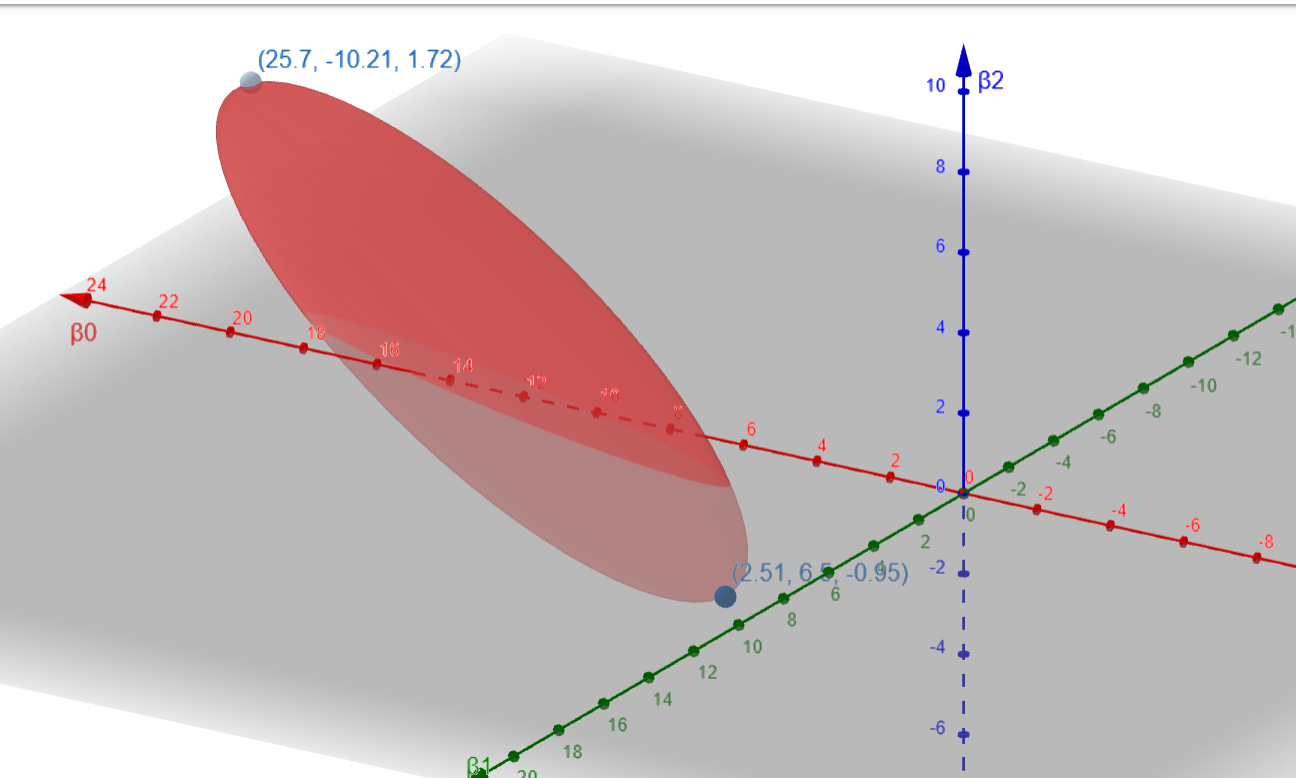

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить ее значимость на уровне $\alpha$

Основная гипотеза о линейной зависимости переменной Y от переменной X: $H_0: \beta_2 = 0$

F-статистика: $ \mathbb{F} = \frac{\hat{\psi} B^-1 \psi }{qs^2} \sim F_{q,n-r}$

Пусть $ B = C^t (XX^t)^{-1} C $

$ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

При основной гипотезе $ C = \pmatrix{0 \\ 0 \\ 1}, \hat{\psi} = \beta_2, q=1$

In [122]:
alpha = 0.05
q = 1
x_alpha = stats.f.ppf(1-alpha, 1, n-3)
print(f'Xalpha = {x_alpha:.3f}')


C = np.array([0,0,1])
matrix_x = np.array([[1.] * n, X, [x**2 for x in X]])
XX_t = np.dot(matrix_x, matrix_x.T)
B = np.dot(np.dot(C.T, np.linalg.inv(XX_t)), C)
F = (beta1 * 1 * beta1) / (B * q * var_estimation)
print(f'Значение статистики F = {F:.3f}')

if F >= x_alpha:
  print('Гипотеза H0 отвергается')
else:
  print('Гипотеза H0 принимается')

Xalpha = 4.047
Значение статистики F = 10.773
Гипотеза H0 отвергается


$ F = 10.773 \geq x_{\alpha} = 4.047$, то есть гипотеза отвергается

In [123]:
p_value = 1 - stats.f.cdf(F, q, n-3)
print(f'Гипотеза H0 отвергается как только уровень значимости превышает {p_value:.3f}')

Гипотеза H0 отвергается как только уровень значимости превышает 0.002


## Выводы

Построена модель линейной регрессии для переменной Y от переменной X с использованием метода наименьших квадратов (МНК) для получения оценок параметров. Также построены несмещенные оценки дисперсии, проверена гипотеза о нормальности ошибок на уровне значимости хи-квадрат и оценено расстояние до класса нормальных распределений по Колмогорову. Для параметров построены доверительные интервалы с уровнем доверия $1 - \alpha$, а также доверительные эллипсоиды. Проведена проверка гипотезы о независимости переменной Y от переменной X на соответствующем уровне значимости, а также о линейной зависимости Y от X с введением дополнительного параметра.